# Laboratorio 1 - Vision por Computadora

## Ejercicio 1

In [ ]:
import matplotlib.pyplot as plt
from skimage import io, exposure
import numpy as np

### Utility Functions

In [ ]:
def do_histogram(image, is_flattened=False):
    if not is_flattened:
        image = image.flatten()

    hist, bins = np.histogram(image, bins=256, range=[0, 256])
    bins = bins[1:]
    return hist, bins

def normalize(np_array: np.ndarray):
    np_array_max = np_array.max()
    normalized_array = np.array([number/np_array_max for number in np_array]).astype(np.float32)
    return normalized_array

def to_255(image):
    return (image * 255).astype(np.uint8)

def equalize_image(image, normalized_cdf: np.ndarray):
    new_image = normalized_cdf[image]
    return to_255(new_image)

### Image Visualization and Procesing

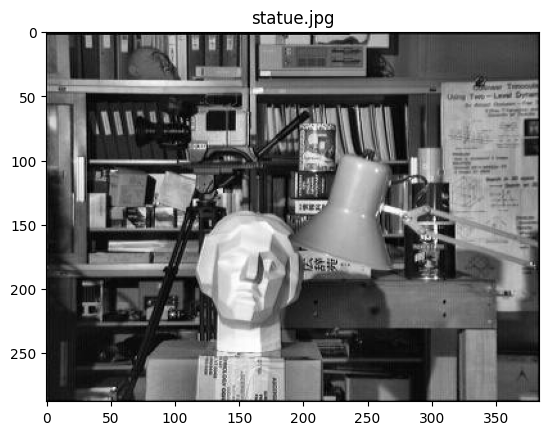

In [ ]:
image = io.imread('images/statue.jpg', as_gray=True)
image = to_255(image)

plt.figure()
plt.imshow(image, cmap='grey')
plt.title("statue.jpg")
plt.show()

In [ ]:
hist, bins = do_histogram(image)
# We compute the CDF
cdf = hist.cumsum()

# We normalize both the CDF asd the histogram
normalized_cdf = normalize(cdf)
normalized_hist = normalize(hist)

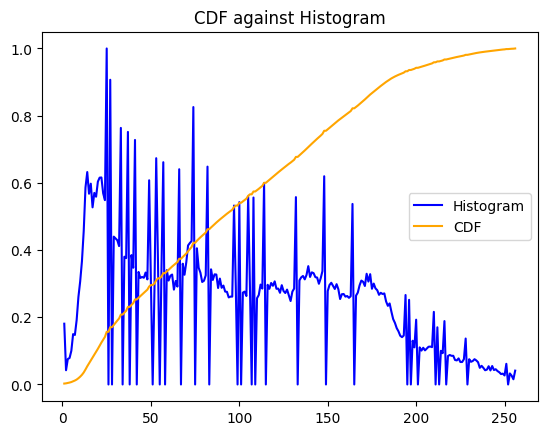

In [ ]:
plt.figure()
plt.plot(bins, normalized_hist, color='blue', label='Histogram')
plt.plot(bins, normalized_cdf, color='orange', label='CDF')
plt.title('CDF against Histogram')
plt.legend()
plt.show()

### Image Equalization

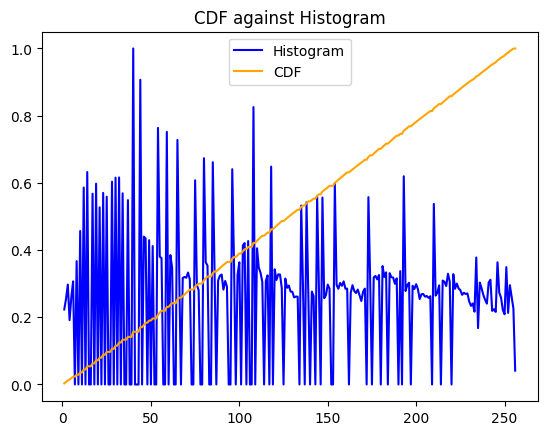

In [ ]:
# Map original pixels to equalized values using the CDF
new_image = equalize_image(image, normalized_cdf)
hist, bins = do_histogram(new_image)
hist = normalize(hist)

# We compute the CDF
new_cdf = hist.cumsum()
normalized_new_cdf = normalize(new_cdf)

plt.figure()
plt.plot(bins, hist, color='blue', label='Histogram')
plt.plot(bins, normalized_new_cdf, color='orange', label='CDF')
plt.title('CDF against Histogram')
plt.legend()
plt.show()

### Image Comparison

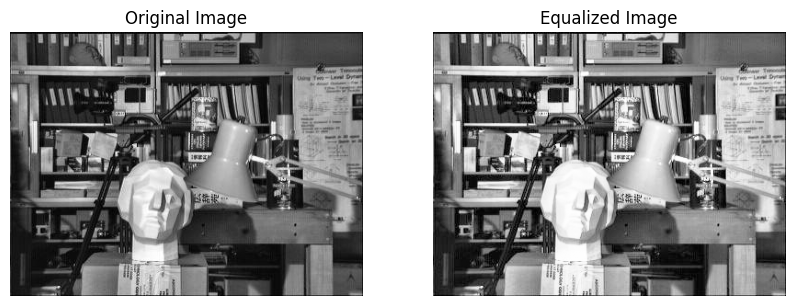

In [ ]:

plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")  # Hide axis

# Equalized Image
plt.subplot(1, 2, 2)
plt.imshow(new_image, cmap='gray')
plt.title("Equalized Image")
plt.axis("off")  # Hide axis

plt.show()

### Funciones de Scikit

In [ ]:
from skimage import io, color, exposure

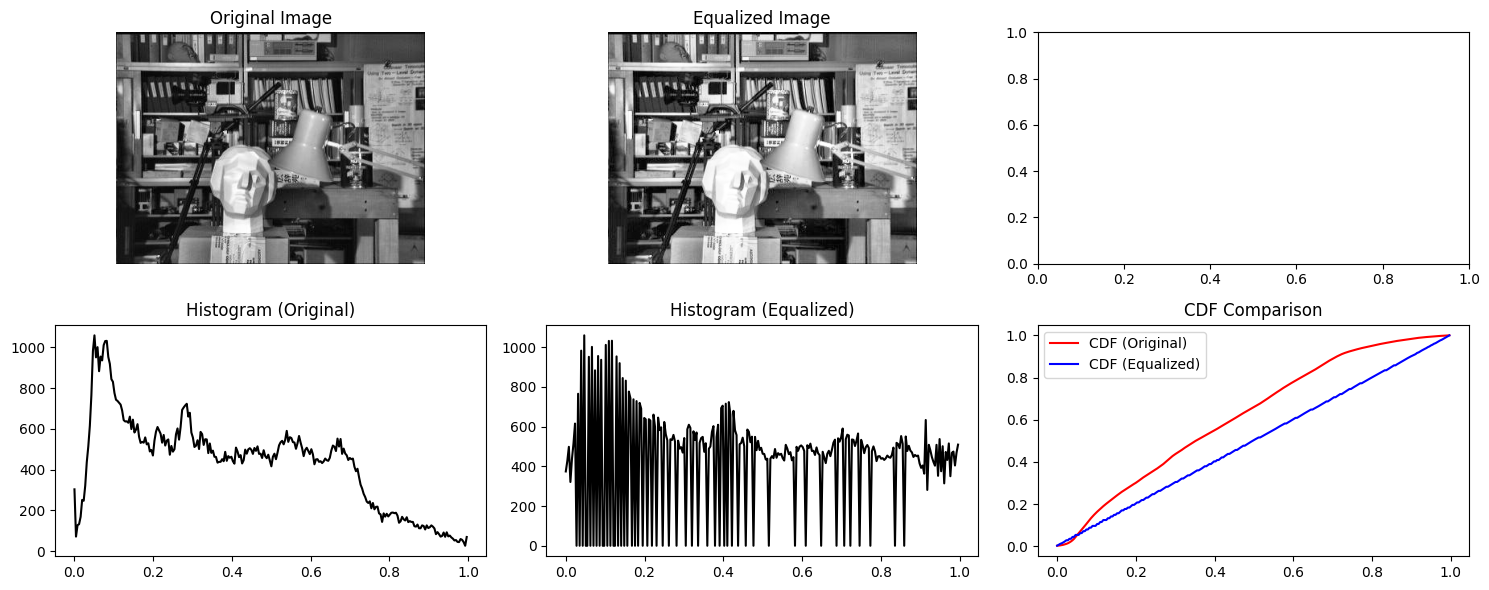

In [ ]:
image = io.imread('images/statue.jpg')  # Replace with your image path
gray = color.rgb2gray(image)

# Equalize the image
equalized = exposure.equalize_hist(gray)

# Compute histograms and CDFs
hist_orig, bins = np.histogram(gray, bins=256, range=(0, 1))
hist_eq, bins_eq = np.histogram(equalized, bins=256, range=(0, 1))

cdf_orig = np.cumsum(hist_orig) / np.sum(hist_orig)
cdf_eq = np.cumsum(hist_eq) / np.sum(hist_eq)

# Plot results
fig, axes = plt.subplots(2, 3, figsize=(15, 6))

# Original Image
axes[0, 0].imshow(gray, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Equalized Image
axes[0, 1].imshow(equalized, cmap='gray')
axes[0, 1].set_title('Equalized Image')
axes[0, 1].axis('off')

# Histogram of Original Image
axes[1, 0].plot(bins[:-1], hist_orig, color='black')
axes[1, 0].set_title('Histogram (Original)')

# Histogram of Equalized Image
axes[1, 1].plot(bins_eq[:-1], hist_eq, color='black')
axes[1, 1].set_title('Histogram (Equalized)')

# CDF of Original Image
axes[1, 2].plot(bins[:-1], cdf_orig, color='red', label='CDF (Original)')
axes[1, 2].plot(bins_eq[:-1], cdf_eq, color='blue', label='CDF (Equalized)')
axes[1, 2].legend()
axes[1, 2].set_title('CDF Comparison')

plt.tight_layout()
plt.show()

### Preguntas

¿Son iguales sus resultados con los de la función de Python? Explique por qué son iguales o explique por qué hay diferencias.

* Al comparar los resultados de mi implementación de ecualización de imágenes con los obtenidos por la función de Python, los resultados son visualmente bastante similares, y no noto ninguna diferencia significativa. Esto se debe a que ambos métodos siguen el mismo principio matemático de ecualización de histograma, redistribuyendo los niveles de intensidad de los píxeles para lograr un histograma más uniforme. Aunque puede haber ligeras diferencias en los cálculos internos, como la normalización de valores o la forma en que se maneja la interpolación, estas variaciones son tan pequeñas que no afectan la calidad visual de la imagen. Las diferencias son mínimas y no perceptibles a simple vista.

## Ejercicio 2

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Otsu

In [ ]:
def otsu_threshold(image):
    # Calcular histograma
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0,256])

    # Normalizar histograma (probabilidad de cada nivel de gris)
    hist = hist.astype(np.float32) / hist.sum()

    # Variables auxiliares
    best_threshold = 0
    max_variance = 0

    # Probabilidades acumuladas y medias acumuladas
    P1 = np.cumsum(hist)  # Suma acumulada de probabilidades
    m1 = np.cumsum(hist * np.arange(256))  # Media acumulada

    for t in range(1, 256):  # Iterar sobre umbrales posibles (1 a 255)
        if P1[t] == 0 or P1[t] == 1:
            continue  # Evitar divisiones por cero

        # Media de las dos clases
        mean_back = m1[t] / P1[t]  # Media de fondo
        mean_fore = (m1[-1] - m1[t]) / (1 - P1[t])  # Media de objeto

        # Varianza entre-clases
        variance_between = P1[t] * (1 - P1[t]) * (mean_back - mean_fore) ** 2

        # Buscar el umbral que maximiza la varianza entre-clases
        if variance_between > max_variance:
            max_variance = variance_between
            best_threshold = t

    return best_threshold

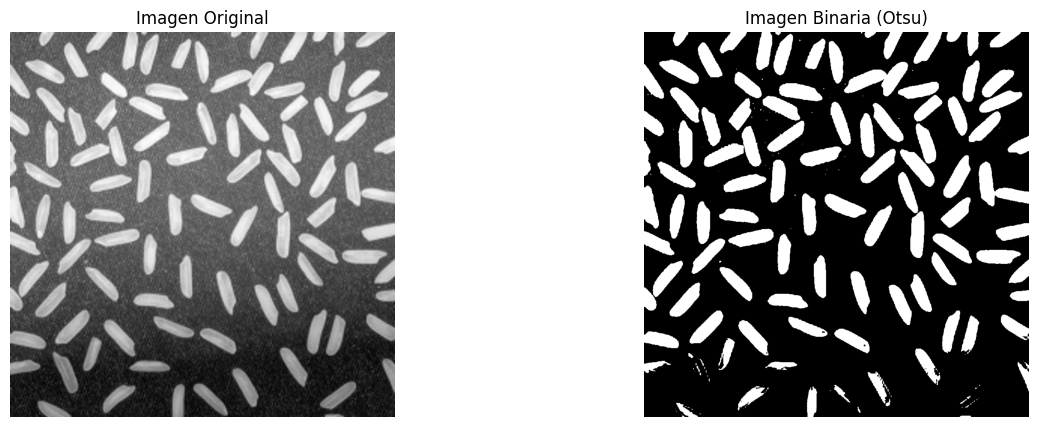

In [ ]:
# Cargar imagen en escala de grises
image = cv2.imread('images/rice.jpg', cv2.IMREAD_GRAYSCALE)

# Obtener umbral de Otsu
threshold = otsu_threshold(image)

# Aplicar umbralización
binary_image = (image > threshold).astype(np.uint8) * 255

# Mostrar resultados
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Imagen Binaria (Otsu)')
axes[1].axis('off')

plt.show()

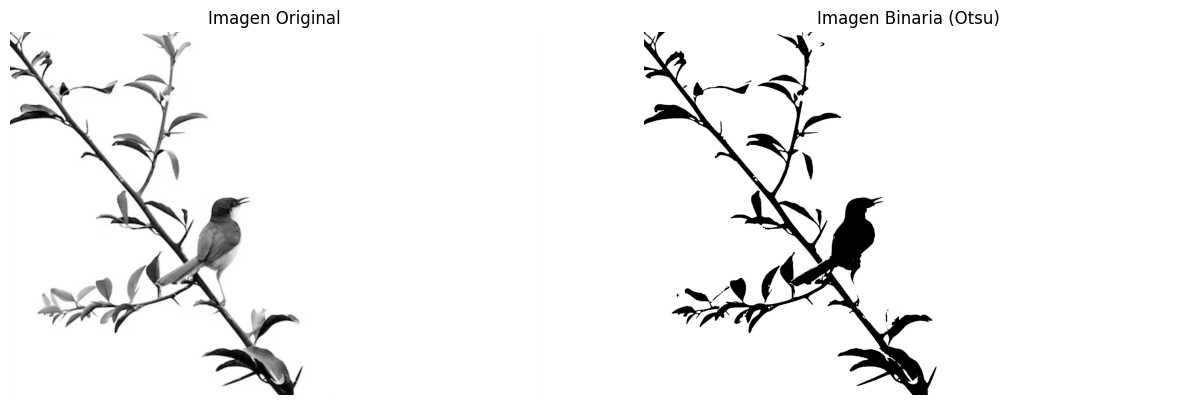

In [ ]:
# Cargar imagen en escala de grises
image = cv2.imread('images/bird.png', cv2.IMREAD_GRAYSCALE)

# Obtener umbral de Otsu
threshold = otsu_threshold(image)

# Aplicar umbralización
binary_image = (image > threshold).astype(np.uint8) * 255

# Mostrar resultados
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Imagen Binaria (Otsu)')
axes[1].axis('off')

plt.show()

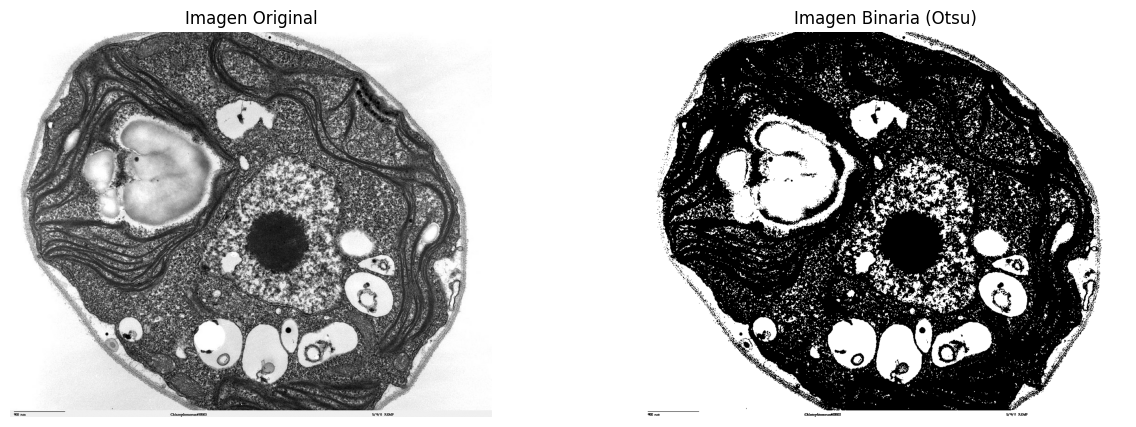

In [ ]:
# Cargar imagen en escala de grises
image = cv2.imread('images/cell.jpg', cv2.IMREAD_GRAYSCALE)

# Obtener umbral de Otsu
threshold = otsu_threshold(image)

# Aplicar umbralización
binary_image = (image > threshold).astype(np.uint8) * 255

# Mostrar resultados
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Imagen Binaria (Otsu)')
axes[1].axis('off')

plt.show()

### Kmeans

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def kmeans_segmentation(image, max_iters=10, tol=1e-4):
    # Aplanar la imagen para trabajar con una lista de intensidades
    pixels = image.flatten().astype(np.float32)

    # Inicializar centroides aleatoriamente en el rango de intensidades
    centroids = np.random.choice(pixels, 2, replace=False)

    for _ in range(max_iters):
        # Asignar cada píxel al cluster más cercano
        distances = np.abs(pixels[:, None] - centroids)  # Distancia a cada centroide
        labels = np.argmin(distances, axis=1)  # 0 o 1 según el centroide más cercano

        # Recalcular centroides como el promedio de cada grupo
        new_centroids = np.array([pixels[labels == i].mean() for i in range(2)])

        # Condición de convergencia (si los centroides no cambian significativamente)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids

    # Crear imagen binaria según los labels obtenidos
    binary_image = (labels.reshape(image.shape) * 255).astype(np.uint8)

    return binary_image

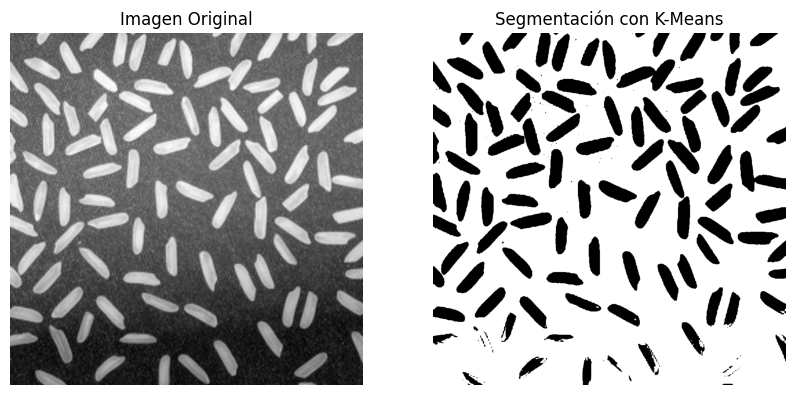

In [ ]:
# Cargar imagen en escala de grises
image = cv2.imread('images/rice.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar segmentación con K-Means
binary_image = kmeans_segmentation(image)

# Mostrar resultados
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Segmentación con K-Means')
axes[1].axis('off')

plt.show()

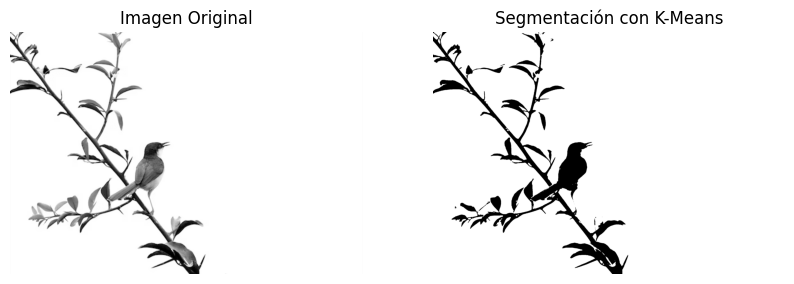

In [ ]:
# Cargar imagen en escala de grises
image = cv2.imread('images/bird.png', cv2.IMREAD_GRAYSCALE)

# Aplicar segmentación con K-Means
binary_image = kmeans_segmentation(image)

# Mostrar resultados
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Segmentación con K-Means')
axes[1].axis('off')

plt.show()

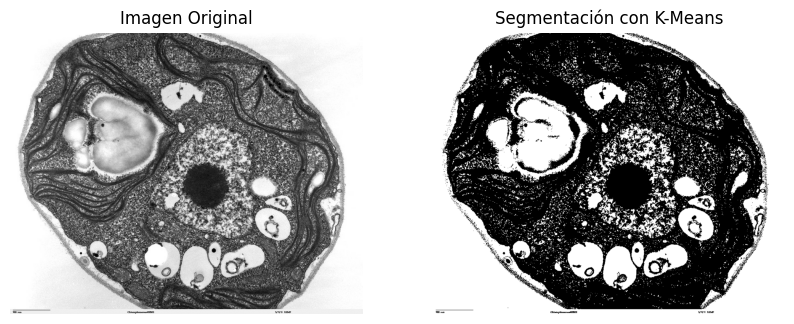

In [ ]:
# Cargar imagen en escala de grises
image = cv2.imread('images/cell.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar segmentación con K-Means
binary_image = kmeans_segmentation(image)

# Mostrar resultados
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Segmentación con K-Means')
axes[1].axis('off')

plt.show()

### Kmeans local

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def local_kmeans_segmentation(image, block_size=50, max_iters=10, tol=1e-4):
    """
    Segmentación binaria usando K-Means local.
    
    Parámetros:
        image: Imagen en escala de grises.
        block_size: Tamaño de los bloques en los que se aplica K-Means.
        max_iters: Número máximo de iteraciones.
        tol: Tolerancia para la convergencia de los centroides.
    
    Retorna:
        segmented_image: Imagen segmentada con K-Means en bloques.
    """
    h, w = image.shape
    segmented_image = np.zeros_like(image, dtype=np.uint8)

    # Recorremos la imagen en bloques
    for y in range(0, h, block_size):
        for x in range(0, w, block_size):
            # Extraer bloque
            block = image[y:y+block_size, x:x+block_size]
            pixels = block.flatten().astype(np.float32)

            # Evitar bloques vacíos
            if len(pixels) == 0:
                continue

            # Inicializar centroides aleatorios
            centroids = np.random.choice(pixels, 2, replace=False)

            for _ in range(max_iters):
                # Asignar cada píxel al cluster más cercano
                distances = np.abs(pixels[:, None] - centroids)
                labels = np.argmin(distances, axis=1)

                # Recalcular centroides como el promedio de cada grupo
                new_centroids = np.array([pixels[labels == i].mean() for i in range(2)])

                # Condición de convergencia
                if np.linalg.norm(new_centroids - centroids) < tol:
                    break
                centroids = new_centroids

            # Crear imagen binaria del bloque
            segmented_block = (labels.reshape(block.shape) * 255).astype(np.uint8)
            segmented_image[y:y+block_size, x:x+block_size] = segmented_block

    return segmented_image

/var/folders/hx/y8xsfw254qj_h_vj_1f6p8kw0000gn/T/ipykernel_65531/4155724066.py:41: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([pixels[labels == i].mean() for i in range(2)])


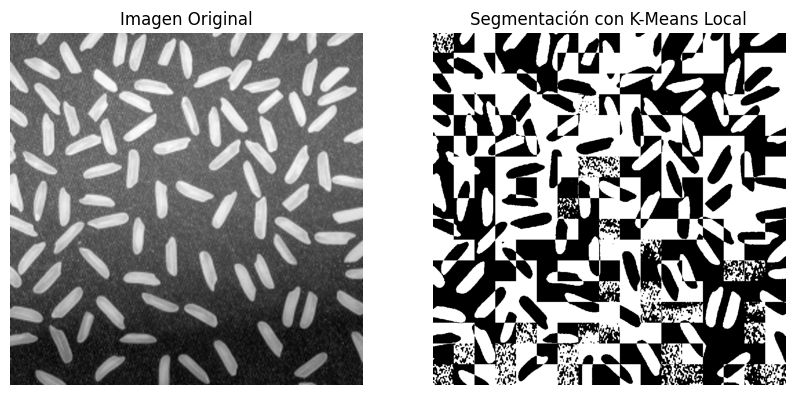

In [ ]:
# Cargar imagen en escala de grises
image = cv2.imread('images/rice.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar segmentación con K-Means local
binary_image = local_kmeans_segmentation(image, block_size=50)

# Mostrar resultados
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Segmentación con K-Means Local')
axes[1].axis('off')

plt.show()

/var/folders/hx/y8xsfw254qj_h_vj_1f6p8kw0000gn/T/ipykernel_65531/4155724066.py:41: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([pixels[labels == i].mean() for i in range(2)])


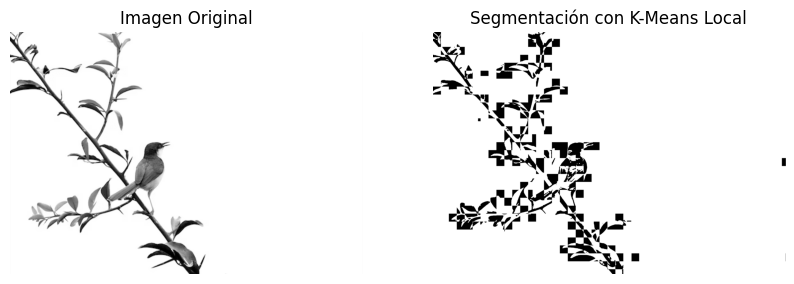

In [ ]:
# Cargar imagen en escala de grises
image = cv2.imread('images/bird.png', cv2.IMREAD_GRAYSCALE)

# Aplicar segmentación con K-Means local
binary_image = local_kmeans_segmentation(image, block_size=50)

# Mostrar resultados
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Segmentación con K-Means Local')
axes[1].axis('off')

plt.show()

/var/folders/hx/y8xsfw254qj_h_vj_1f6p8kw0000gn/T/ipykernel_65531/4155724066.py:41: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([pixels[labels == i].mean() for i in range(2)])


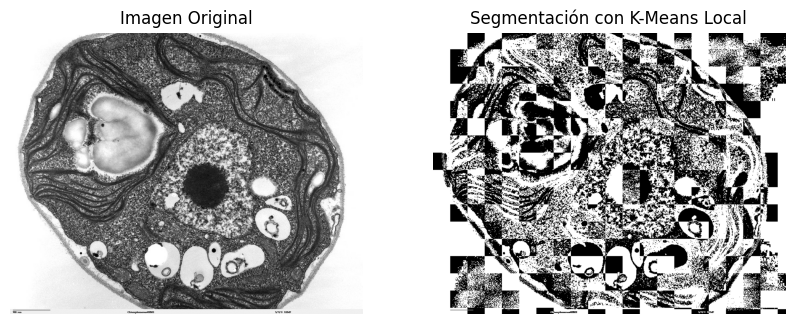

In [ ]:
# Cargar imagen en escala de grises
image = cv2.imread('images/cell.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar segmentación con K-Means local
binary_image = local_kmeans_segmentation(image, block_size=50)

# Mostrar resultados
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Segmentación con K-Means Local')
axes[1].axis('off')

plt.show()

### Conclusión
En general, el algoritmo de Otsu suele ofrecer los resultados más consistentes y confiables en la segmentación binaria de imágenes. Esto se debe a que calcula un umbral óptimo de forma determinista, minimizando la varianza intra-clase.

Por otro lado, K-Means, al ser un algoritmo estocástico, puede generar resultados menos estables, ya que la posición inicial de los centroides influye en el umbral obtenido, lo que a veces resulta en un umbral demasiado alto o demasiado bajo.

La versión local de K-Means mostró el peor desempeño, ya que, aunque logra una buena segmentación dentro de cada bloque, la imagen completa suele presentar discontinuidades y pérdida de calidad debido a la falta de coherencia entre bloques adyacentes.

## Ejercicio 3

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

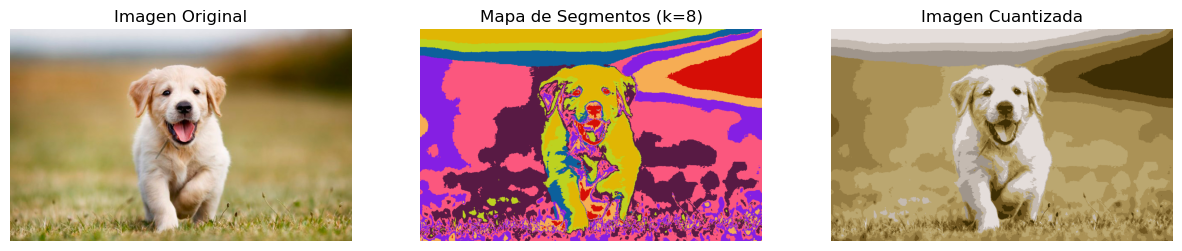

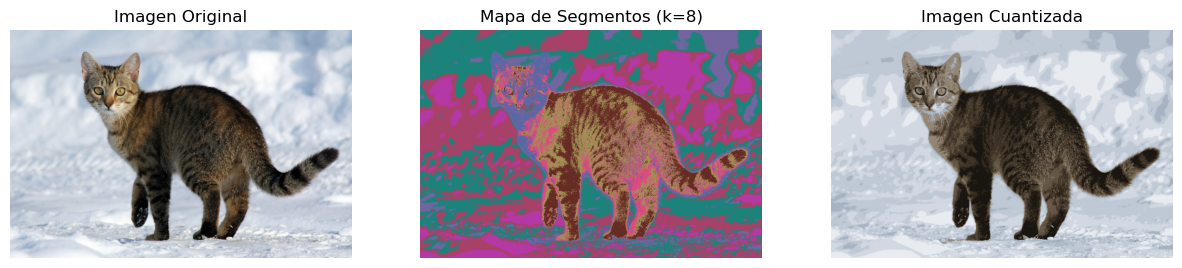

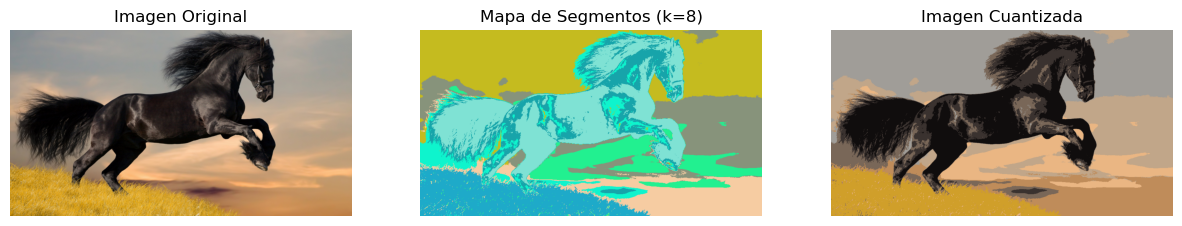

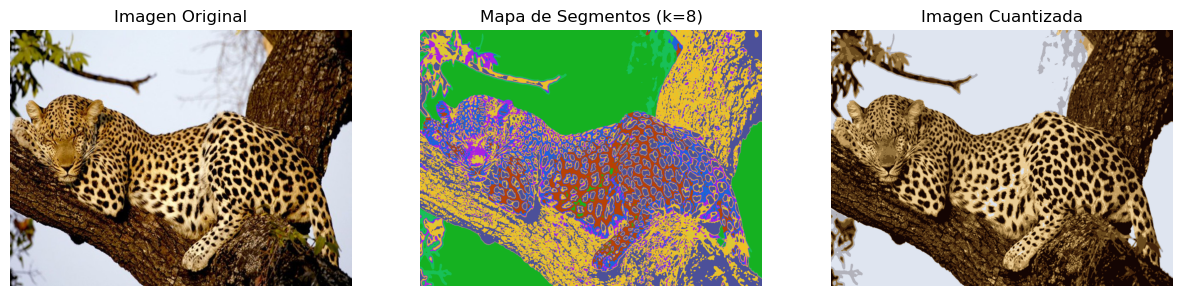

In [ ]:
def segmentation(image, k):
    x, y, z = image.shape
    pixels = image.reshape((-1, 3))
    pixels = np.float32(pixels)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    
    _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    
    quantized_image = centers[labels.flatten()].reshape((x, y, z))
    
    labels_reshaped = labels.reshape((x, y))
    segment_map = np.zeros((x, y, 3), dtype=np.uint8)
    colors = np.random.randint(0, 255, (k, 3), dtype=np.uint8)
    
    for i in range(k):
        segment_map[labels_reshaped == i] = colors[i]

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(image)
    axs[0].set_title("Imagen Original")
    axs[0].axis("off")
    
    axs[1].imshow(segment_map)
    axs[1].set_title(f"Mapa de Segmentos (k={k})")
    axs[1].axis("off")
    
    axs[2].imshow(quantized_image)
    axs[2].set_title("Imagen Cuantizada")
    axs[2].axis("off")
    
    plt.show()

image_paths = [
    "./images/perro.jpg",
    "./images/gato.jpg",
    "./images/cab.png",
    "./images/leo.jpg"
]

images = []
for path in image_paths:
    img = cv2.imread(path)
    if img is None:
        raise FileNotFoundError(f"Archivo no encontrado: {path}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)

k = int(input("Ingrese el número de segmentos que desea utilizar: "))
while k < 2:
    k = int(input("Ingrese el número de segmentos que desea utilizar (mayor o igual a 2): "))

for img in images:
    segmentation(img, k)

# Ejercicio 4
Considere las imagenes coca-cola.jpeg y pepsi.png. En cada una, convierta la imagen RGB a un espacio de color
cromatico adecuado, y elabore el histograma del canal de cromaticidad. A partir de analizar este histograma, concluya que esta ocurriendo con los colores en cada imagen.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# Directorio de imágenes
image_dir = "images"

In [ ]:
# Cargar iamges originales en BGR
coca_cola_bgr = cv2.imread(os.path.join(image_dir, "coca-cola.jpeg"))
pepsi_bgr = cv2.imread(os.path.join(image_dir, "pepsi.png"))


In [ ]:
# Convertir a RGB para mejor visualizacion
coca_cola_rgb = cv2.cvtColor(coca_cola_bgr, cv2.COLOR_BGR2RGB)
pepsi_rgb = cv2.cvtColor(pepsi_bgr, cv2.COLOR_BGR2RGB)

In [ ]:
# Convertir a HSV
coca_cola_hsv = cv2.cvtColor(coca_cola_bgr, cv2.COLOR_BGR2HSV)
pepsi_hsv = cv2.cvtColor(pepsi_bgr, cv2.COLOR_BGR2HSV)

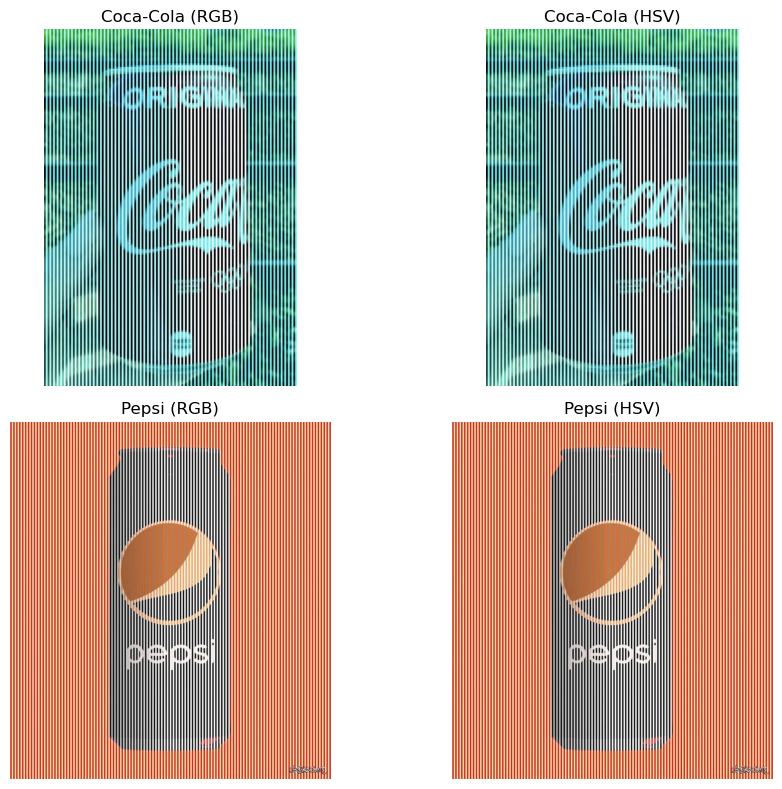

In [ ]:
# Mostrar imágenes originales y en HSV
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].imshow(coca_cola_rgb)
axes[0, 0].set_title("Coca-Cola (RGB)")
axes[0, 0].axis("off")

axes[0, 1].imshow(cv2.cvtColor(coca_cola_hsv, cv2.COLOR_HSV2RGB))
axes[0, 1].set_title("Coca-Cola (HSV)")
axes[0, 1].axis("off")

axes[1, 0].imshow(pepsi_rgb)
axes[1, 0].set_title("Pepsi (RGB)")
axes[1, 0].axis("off")

axes[1, 1].imshow(cv2.cvtColor(pepsi_hsv, cv2.COLOR_HSV2RGB))
axes[1, 1].set_title("Pepsi (HSV)")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

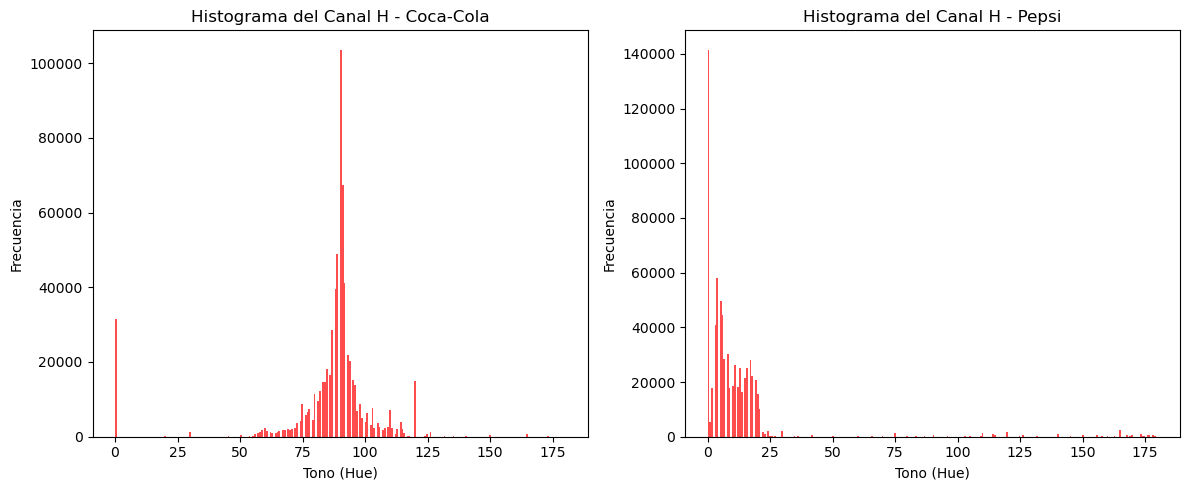

In [ ]:
# Graficar histogramas de los canales H
plt.figure(figsize=(12, 5))
for i, (name, hue) in enumerate(hue_channels.items(), 1):
    plt.subplot(1, 2, i)
    plt.hist(hue.ravel(), bins=256, range=[0, 180], color='red', alpha=0.7)
    plt.title(f"Histograma del Canal H - {name}")
    plt.xlabel("Tono (Hue)")
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

## Analisis de Histogramas
### 1. Coca-Cola:
- El histograma muestra un pico pronunciado en tonos entre 75 y 100, que corresponde a colores rojos y anaranjados en el espacio HSV.
- Se observa otra pequeña concentración alrededor de 0-10, lo que sugiere la presencia de rojos puros, típicos de la marca Coca-Cola.
- Esto confirma que la imagen tiene una predominancia de colores rojos y cálidos.

### 2. Pepsi:
- El histograma muestra una alta concentración en tonos cercanos a 0-25, lo que corresponde a colores azules y oscuros.
- A diferencia de Coca-Cola, aquí no hay picos en la región de 75-100, lo que indica la ausencia de tonos rojizos.
- Se confirma que la imagen de Pepsi tiene predominancia de azules, característico de su branding.

### Conclusion
El análisis de los histogramas de cromaticidad corrobora lo esperado en términos de branding de ambas marcas:

Coca-Cola: Su imagen contiene principalmente rojos y tonos cálidos.
Pepsi: Su imagen está dominada por azules y tonos fríos.

## Ejercicio 5
Implemente un algoritmo de segmentacion binaria que identifique correctamente todos los granos de arroz en la imagen rice.png. (No se puede aplicar un metodo local).

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# Cargar la imagen
image_path = os.path.join("images", "rice.jpg")
rice_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [ ]:
# Aplicar filtro Gaussiano para suavizar la imagen y reducir ruido
blurred = cv2.GaussianBlur(rice_img, (5,5), 0)

# Aplicar umbralización de Otsu
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Aplicar una operación morfológica (apertura) para eliminar ruido
kernel = np.ones((3,3), np.uint8)
processed = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

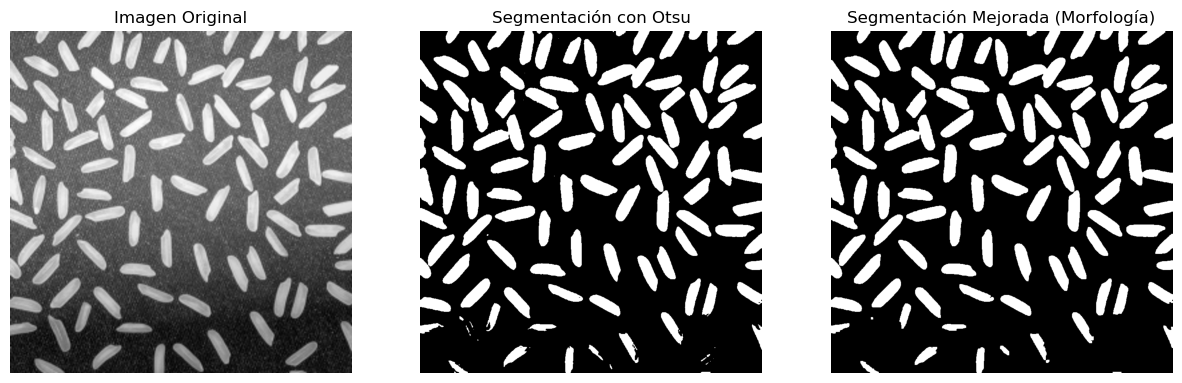

In [ ]:
# Mostrar resultados
fig, ax = plt.subplots(1, 3, figsize=(15,5))

ax[0].imshow(rice_img, cmap="gray")
ax[0].set_title("Imagen Original")
ax[0].axis("off")

ax[1].imshow(binary, cmap="gray")
ax[1].set_title("Segmentación con Otsu")
ax[1].axis("off")

ax[2].imshow(processed, cmap="gray")
ax[2].set_title("Segmentación Mejorada (Morfología)")
ax[2].axis("off")

plt.show()

### Analisis de los resultados
#### Imagen Original
- Presenta una iluminación no uniforme: los granos de arroz en la parte superior son más claros que los de la parte inferior.
- El fondo también tiene variaciones de intensidad, lo que puede dificultar la segmentación con métodos globales.

#### Segmentación con Otsu
- Otsu intenta encontrar un umbral óptimo, pero debido a la variación de iluminación, algunos granos de arroz en la parte inferior no se segmentan correctamente.
- Hay ruido en algunas regiones oscuras donde se observa parte del fondo segmentado incorrectamente.

#### Segmentación Mejorada (Morfología)
- Se eliminó una cantidad considerable de ruido con la operación morfológica.
- Sin embargo, todavía hay pequeños fragmentos oscuros en la parte inferior que no se segmentaron bien.
- Algunos granos de arroz pueden estar pegados debido al cierre morfológico.

### Mejoras

In [ ]:
# Aplicar CLAHE para mejorar el contraste
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(rice_img)

# filtro gaussiano
blurred = cv2.GaussianBlur(enhanced, (5,5), 0)

# otsu
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# morfologia
kernel = np.ones((3,3), np.uint8)
processed = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

# Crear marcador para Watershed
sure_bg = cv2.dilate(processed, kernel, iterations=3)
dist_transform = cv2.distanceTransform(processed, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Etiquetar los objetos
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Aplicar Watershed
rice_color = cv2.cvtColor(rice_img, cv2.COLOR_GRAY2BGR)
cv2.watershed(rice_color, markers)
rice_color[markers == -1] = [0, 0, 255]  # Bordes en rojo

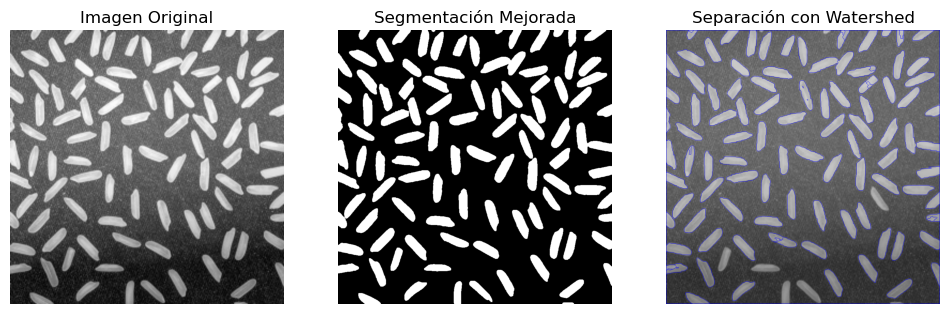

In [ ]:
# Mostrar resultados
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(rice_img, cmap='gray')
ax[0].set_title('Imagen Original')
ax[1].imshow(processed, cmap='gray')
ax[1].set_title('Segmentación Mejorada')
ax[2].imshow(rice_color)
ax[2].set_title('Separación con Watershed')

for a in ax:
    a.axis('off')

plt.show()


### Analisis de los resultados
- Watershed logró separar los granos que estaban pegados, algo que la segmentación con Otsu no podía hacer por sí sola.
- Se observan contornos marcados en azul en la imagen, indicando que los granos que estaban muy juntos han sido correctamente diferenciados.
- Aunque funciona bien, en algunos casos podría correr un riesgo de haber sobresegmentación (separando partes de un mismo grano como si fueran varios).

### Conclusiones
- La mejora en la segmentación permitió identificar con mayor precisión los granos de arroz, incluso en las áreas más oscuras.
- Watershed ayudó a separar granos pegados, mejorando la detección individual de cada elemento.
- La combinación de CLAHE + Otsu + Morfología + Watershed resultó ser una estrategia robusta para la segmentación de esta imagen.

## Ejercicio 6

Implementar un detector de color YELLOW que funciones en tiempo real en un video. Para ello, implementar el algoritmo en OpenCV, de modo que capture las imágenes directamente de la cámara de su PC, y que muestre el resultado de la detección en tiempo real en pantalla. Si usted lo desea, puede diseñar el detector para que detecte otros colores diferentes. Mostrar en su informe, resultados (screenshots) del funcionamiento de su detector.

### Librerias

In [ ]:
import cv2 as cv
import numpy as np
from PIL import Image

### Generador de Límites

In [ ]:
def get_limits(color, delta):
    """
    Obtener los límites de un color en el espacio HSV

    Args:
        color (list): color en BGR
        delta (int): margen de error

    Returns:
        np.array: color en HSV
        np.array: límite inferior
        np.array: límite superior
    """
    # Convertir el color a HSV
    rgb_color = np.uint8([[color]])
    hsv_color = cv.cvtColor(rgb_color, cv.COLOR_BGR2HSV)

    # Definir los limites del color en HSV
    h_value = int(hsv_color[0][0][0])
    min_limit = np.array([max(h_value - delta, 0), 100, 100], dtype=np.uint8)
    max_limit = np.array([min(h_value + delta, 179), 255, 255], dtype=np.uint8)

    return min_limit, max_limit

### Captura de Video y detección de color

In [ ]:
# Definir el color BGR
YELLOW = [0, 255, 255]

In [ ]:
# Inicializar la captura de video
webcam = cv.VideoCapture(0)

# Iniciar el bucle para capturar frames
while True:
    # Leer un frame de la captura
    ret, frame = webcam.read()
    
    # Convertir el frame a HSV para analizar los colores
    hsv_frame = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    # Obtener los límites del color amarillo
    yellow_min, yellow_max = get_limits(YELLOW, 15)

    # Generar una máscara para el color amarillo
    mask = cv.inRange(hsv_frame, yellow_min, yellow_max)
    mask_ = Image.fromarray(mask)
    # Encontrar los contornos de la máscara
    bbox = mask_.getbbox()

    # Dibujar un rectángulo en el frame
    if bbox is not None:
        x1, y1, x2, y2 = bbox
        cv.rectangle(frame, (x1, y1), (x2, y2), YELLOW, 5)
        cv.putText(frame, 'Yellow', (x1, y1 - 10), cv.FONT_HERSHEY_SIMPLEX, 0.9, YELLOW, 2)

    # Mostrar el frame
    cv.imshow('Webcam', frame)

    # Salir del bucle si se presiona la tecla 'q'
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar la captura de video y cerrar las ventanas
webcam.release()
cv.destroyAllWindows()

### Screenshots

![Captura de pantalla 2025-02-11 165121.png](<attachment:Captura de pantalla 2025-02-11 165121.png>)
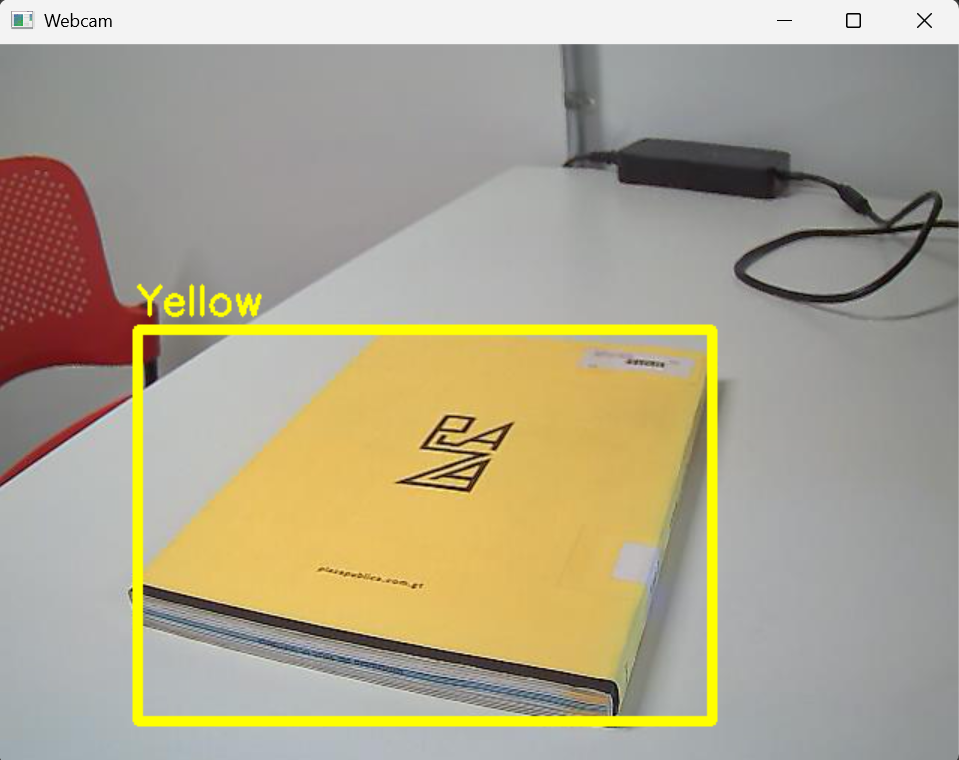

![Captura de pantalla 2025-02-11 165239.png](<attachment:Captura de pantalla 2025-02-11 165239.png>)
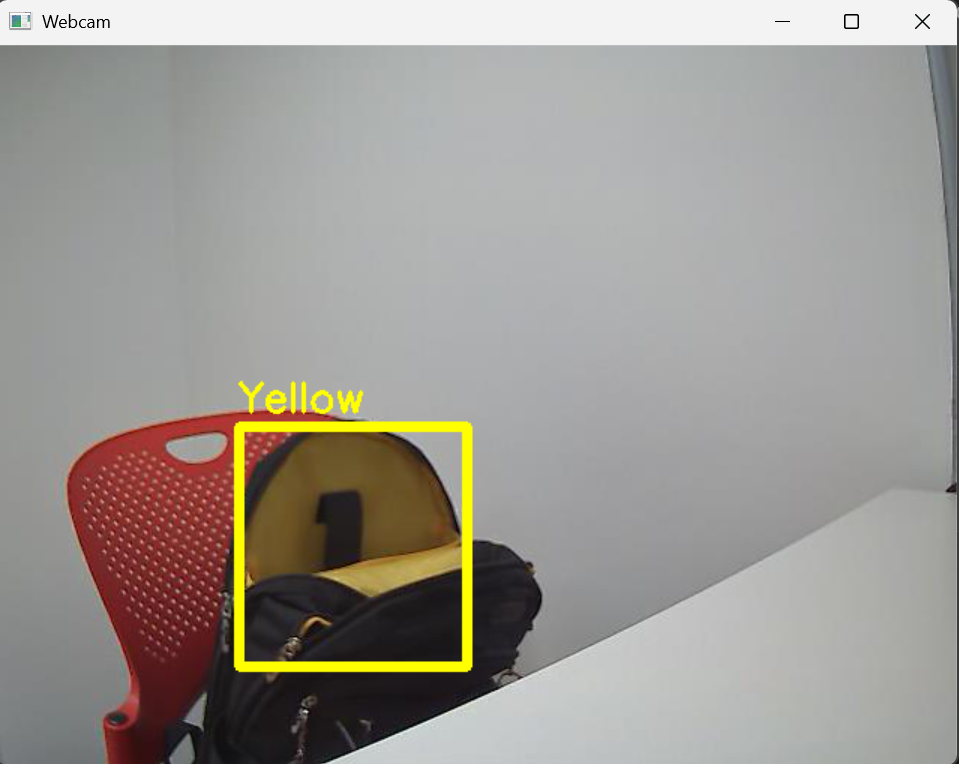

![Captura de pantalla 2025-02-11 165701.png](<attachment:Captura de pantalla 2025-02-11 165701.png>)
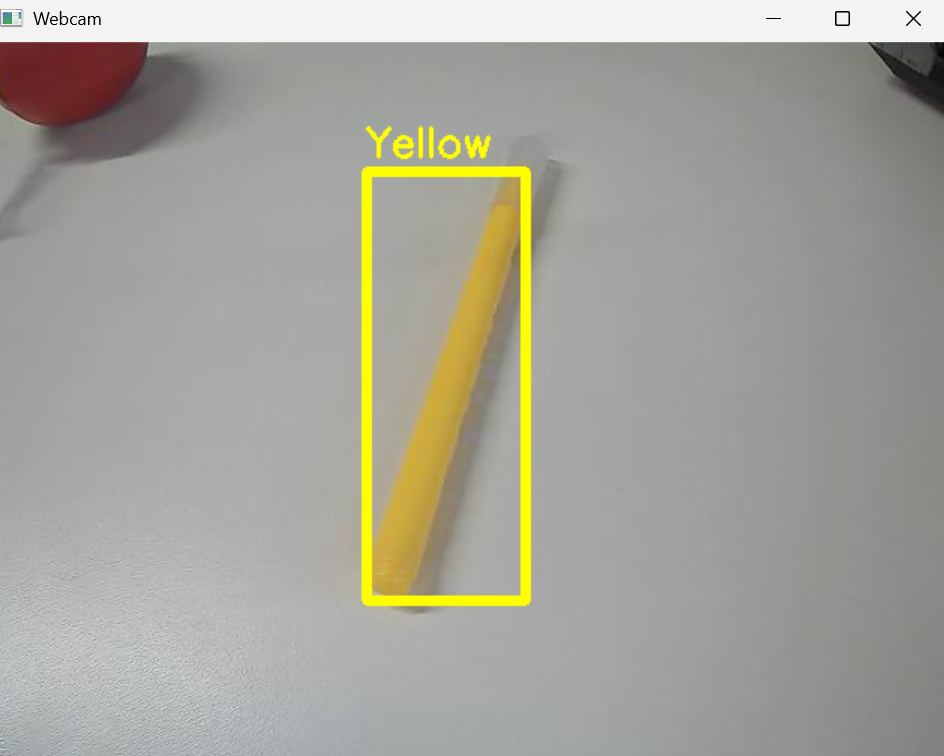